# Load Dependencies

In [2]:
import pandas as pd
import numpy as np
import glob
import tensorflow as tf
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from script_baseline.Baseline_MG import Get_Baseline_MG_feat_pack
from script_baseline.MIGNN import MIGNN2,Graph_DataLoader
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

# Load Data

In [3]:
data_file = '../Data/data2/data2.csv'
mol_dir = '../Data/data2/xtb_sdf/'
tmp_df = pd.read_csv(data_file)
cat_smiles = tmp_df['Catalyst'].to_list()
imine_smiles = tmp_df['Imine'].to_list()
thiol_smiles = tmp_df['Thiol'].to_list()
labels = tmp_df['Output'].to_list()
label_std = (np.array(labels)-np.min(labels))/(np.max(labels)-np.min(labels))

In [4]:
def sort_func(x): return eval(x.split('/')[-1].split('.')[0].split('_')[-1])
cat_files = sorted(glob.glob(mol_dir+'cat_*.sdf'),key=sort_func)
imine_files = sorted(glob.glob(mol_dir+'imine_*.sdf'),key=sort_func)
thiol_files = sorted(glob.glob(mol_dir+'thiol_*.sdf'),key=sort_func)

sdf_file=cat_files+imine_files+thiol_files
with open(mol_dir+'smiles_file_dict.csv','r') as fr:
    lines = fr.readlines()
smiles_name_dict = {tmp_line.strip().split(',')[0]:tmp_line.strip().split(',')[1] for tmp_line in lines}

# Generate Baseline MG

In [5]:
imine_feat,imine_feat_name_dict=Get_Baseline_MG_feat_pack(imine_files)

../Data/data2/xtb_sdf/imine_0.sdf
../Data/data2/xtb_sdf/imine_1.sdf
../Data/data2/xtb_sdf/imine_2.sdf
../Data/data2/xtb_sdf/imine_3.sdf
../Data/data2/xtb_sdf/imine_4.sdf


/PyScripts/PyTorch.dir/LSW/SEMG_MIGNN/SEMG_MIGNN1/baseline/script_baseline/Baseline_MG.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_atom_feats=np.array(all_atom_feats)


In [6]:
cat_feat,cat_feat_name_dict=Get_Baseline_MG_feat_pack(cat_files)

../Data/data2/xtb_sdf/cat_0.sdf
../Data/data2/xtb_sdf/cat_1.sdf
../Data/data2/xtb_sdf/cat_2.sdf
../Data/data2/xtb_sdf/cat_3.sdf
../Data/data2/xtb_sdf/cat_4.sdf
../Data/data2/xtb_sdf/cat_5.sdf
../Data/data2/xtb_sdf/cat_6.sdf
../Data/data2/xtb_sdf/cat_7.sdf
../Data/data2/xtb_sdf/cat_8.sdf
../Data/data2/xtb_sdf/cat_9.sdf
../Data/data2/xtb_sdf/cat_10.sdf
../Data/data2/xtb_sdf/cat_11.sdf
../Data/data2/xtb_sdf/cat_12.sdf
../Data/data2/xtb_sdf/cat_13.sdf
../Data/data2/xtb_sdf/cat_14.sdf
../Data/data2/xtb_sdf/cat_15.sdf
../Data/data2/xtb_sdf/cat_16.sdf
../Data/data2/xtb_sdf/cat_17.sdf
../Data/data2/xtb_sdf/cat_18.sdf
../Data/data2/xtb_sdf/cat_19.sdf
../Data/data2/xtb_sdf/cat_20.sdf
../Data/data2/xtb_sdf/cat_21.sdf
../Data/data2/xtb_sdf/cat_22.sdf
../Data/data2/xtb_sdf/cat_23.sdf
../Data/data2/xtb_sdf/cat_24.sdf
../Data/data2/xtb_sdf/cat_25.sdf
../Data/data2/xtb_sdf/cat_26.sdf
../Data/data2/xtb_sdf/cat_27.sdf
../Data/data2/xtb_sdf/cat_28.sdf
../Data/data2/xtb_sdf/cat_29.sdf
../Data/data2/xtb_sd

/PyScripts/PyTorch.dir/LSW/SEMG_MIGNN/SEMG_MIGNN1/baseline/script_baseline/Baseline_MG.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_atom_feats=np.array(all_atom_feats)


In [7]:
thiol_feat,thiol_feat_name_dict=Get_Baseline_MG_feat_pack(thiol_files)

../Data/data2/xtb_sdf/thiol_0.sdf
../Data/data2/xtb_sdf/thiol_1.sdf
../Data/data2/xtb_sdf/thiol_2.sdf
../Data/data2/xtb_sdf/thiol_3.sdf
../Data/data2/xtb_sdf/thiol_4.sdf


/PyScripts/PyTorch.dir/LSW/SEMG_MIGNN/SEMG_MIGNN1/baseline/script_baseline/Baseline_MG.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_atom_feats=np.array(all_atom_feats)


In [8]:
total_cat_feat = np.array([cat_feat[cat_feat_name_dict[smiles_name_dict[tmp_smi]]] for tmp_smi in cat_smiles])
total_imine_feat = np.array([imine_feat[imine_feat_name_dict[smiles_name_dict[tmp_smi]]] for tmp_smi in imine_smiles])
total_thiol_feat = np.array([thiol_feat[thiol_feat_name_dict[smiles_name_dict[tmp_smi]]] for tmp_smi in thiol_smiles])
react_feat = np.concatenate([total_cat_feat,total_imine_feat,total_thiol_feat],axis=1)
labels_std = (np.array(labels)-np.min(labels))/(np.max(labels)-np.min(labels))

# Train Model

In [9]:
batch_size = 32
shuffle = np.array(list(range(len(react_feat))))
np.random.shuffle(shuffle)
train_index = shuffle[:600]
val_index = shuffle[600:]
feat_train,y_train = react_feat[train_index],label_std[train_index]
feat_val,y_val = react_feat[val_index],label_std[val_index]

train_gen = Graph_DataLoader(feat_train,y_train,batch_size=batch_size)
valid_gen = Graph_DataLoader(feat_val,y_val,batch_size=batch_size)
valid_gen_predict = Graph_DataLoader(feat_val,y_val,batch_size=batch_size,predict=True)
opt = tf.keras.optimizers.Adam()

In [ ]:
model_opt = MIGNN2(depth=2,hidden_size=256,attention_depth=2,attention_depth_inter=2,end_attention=2,fc_size=256)

model_opt.compile(optimizer=opt,loss='mse')
checkpoint = tf.train.Checkpoint(myAwesomeModel=model_opt)
EPOCHS = 50
for epoch in range(EPOCHS):
    hist = model_opt.fit(train_gen,validation_data=valid_gen)
    path = checkpoint.save('./dataset/run_data/data2_Baseline_MG_MIGNN.ckpt')
    print("model saved to %s" % path)  

In [ ]:
opt = tf.keras.optimizers.Adam()
new_model = MIGNN2(depth=2,hidden_size=256,attention_depth=2,attention_depth_inter=2,end_attention=2,fc_size=256)
new_model.compile(optimizer=opt,loss='mse')
_ = new_model.fit(valid_gen,epochs=1)
checkpoint = tf.train.Checkpoint(myAwesomeModel=new_model) 
checkpoint.restore('./dataset/run_data/data2_Baseline_MG_MIGNN.ckpt-50')

y_test_pre=new_model.predict(valid_gen_predict)
y_val=label_std[val_index]
y_val = y_val*(np.max(labels)-np.min(labels))+np.min(labels)
y_pred = y_test_pre*(np.max(labels)-np.min(labels))+np.min(labels)

# Results

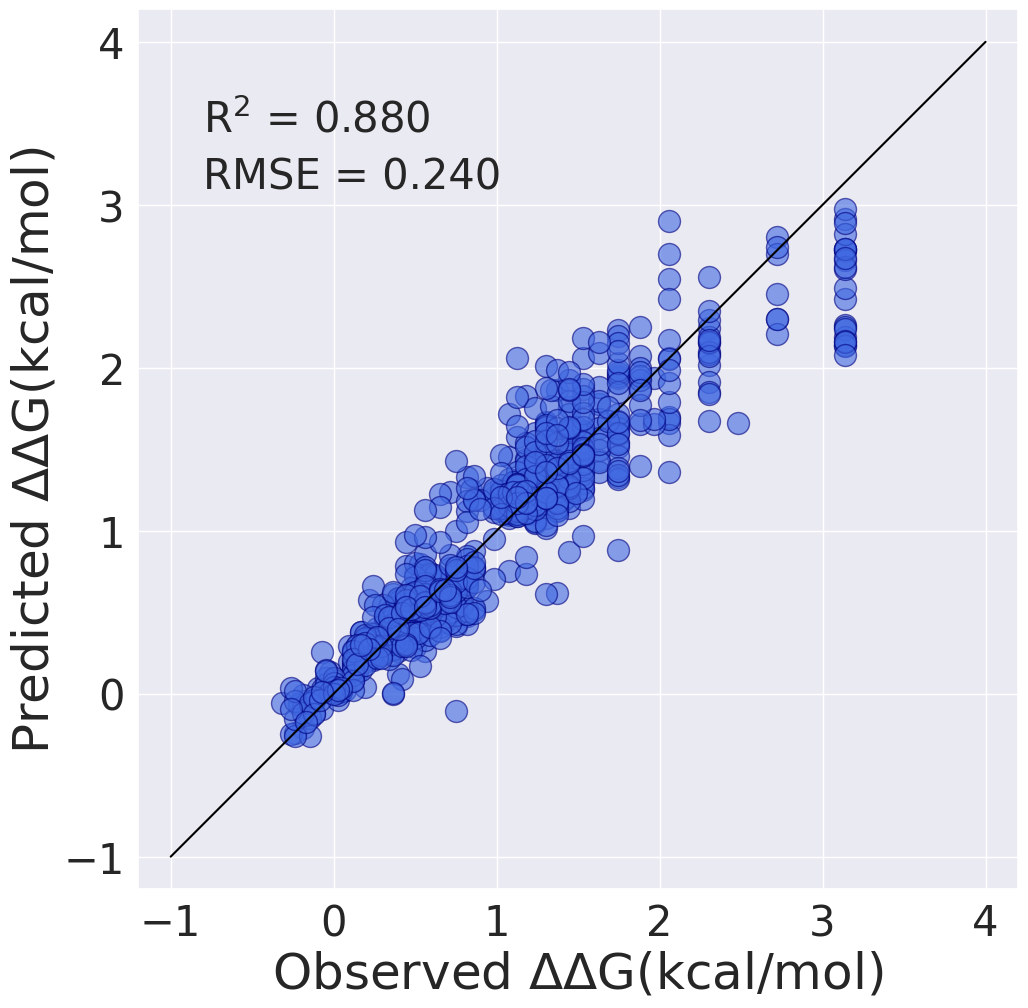

In [3]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')

plt.xlim(-1.2,4.2)
plt.ylim(-1.2,4.2)
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(1)
ax=plt.gca()

ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)

plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)
plt.show()

In [12]:
np.save('../result/data2_Baseline_MG_MIGNN_y_val.npy',y_val)
np.save('../result/data2_Baseline_MG_MIGNN_y_pred.npy',y_pred)